In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from IPython.display import Image
from IPython.core.display import HTML
from pyDecision.algorithm import electre_i
from EasyMCDM.models.Electre import Electre


### Bayes

In [2]:
#df = pd.read_csv('../results/res_bayes/pareto_front.csv', index_col=0)
df = pd.read_csv('final_pareto.csv')

In [31]:
df.head()

,Unnamed: 0,fitness1,fitness2,rank,genes,to_remove
0,0,0.594145,72,1,"[2, 2, 1, 3, 2, 1, 0, 2, 0]",True
1,2,0.174849,137,1,"[1, 1, 1, 2, 2, 1, 0, 1, 3]",True
2,4,0.550484,75,1,"[2, 2, 1, 2, 2, 1, 0, 2, 0]",True
3,6,0.388188,108,1,"[1, 3, 1, 3, 3, 1, 3, 1, 0]",True
4,10,0.174849,137,1,"[1, 1, 1, 2, 2, 1, 0, 1, 3]",True


In [32]:
# criterion: proportion of sensors of type zero should be minimized
number_of_sensors_0 = []
for genotype in df.genes:
    number_of_sensors_0.append(genotype.count('0'))

df['fitness3'] = number_of_sensors_0

In [33]:
dataset = np.array([[f1, f2, f3] for f1, f2, f3 in zip(df['fitness1'], df['fitness2'], df['fitness3'])])

alternatives = [[f1, f2] for f1, f2 in zip(df['fitness1'], df['fitness2'])]
data = {}

for i in range (len(alternatives)):
    data['A'+str(i)] = alternatives[i]

In [34]:
weights = [0.7, 0.3]
prefs = ["min", "min"]
vetoes = [1.0, 10]
indifference_threshold = 0.7
preference_thresholds = None # or None for Electre Iv

e = Electre(data=data, verbose=False)

results = e.solve(weights, prefs, vetoes, indifference_threshold, preference_thresholds)

In [35]:
results

{'kernels': ['A0',
  'A2',
  'A14',
  'A81',
  'A99',
  'A103',
  'A105',
  'A107',
  'A108',
  'A109',
  'A110',
  'A112',
  'A114',
  'A117',
  'A157',
  'A190',
  'A253',
  'A257',
  'A287',
  'A308',
  'A314',
  'A315',
  'A316'],
 'frequent_kernels': ['A2 (21)',
  'A0 (13)',
  'A14 (13)',
  'A81 (13)',
  'A99 (13)',
  'A103 (13)',
  'A105 (13)',
  'A107 (13)',
  'A108 (13)',
  'A109 (13)',
  'A110 (13)',
  'A112 (13)',
  'A114 (13)',
  'A117 (13)',
  'A157 (13)',
  'A190 (13)',
  'A253 (13)',
  'A257 (13)',
  'A287 (13)',
  'A308 (13)',
  'A314 (13)',
  'A315 (13)',
  'A316 (13)',
  'A1 (1)',
  'A3 (1)',
  'A4 (1)',
  'A5 (1)',
  'A6 (1)',
  'A7 (1)',
  'A8 (1)',
  'A9 (1)',
  'A10 (1)',
  'A11 (1)',
  'A12 (1)',
  'A13 (1)',
  'A15 (1)',
  'A16 (1)',
  'A17 (1)',
  'A18 (1)',
  'A19 (1)',
  'A20 (1)',
  'A21 (1)',
  'A22 (1)',
  'A23 (1)',
  'A24 (1)',
  'A25 (1)',
  'A26 (1)',
  'A27 (1)',
  'A28 (1)',
  'A29 (1)',
  'A30 (1)',
  'A31 (1)',
  'A32 (1)',
  'A33 (1)',
  'A34 (1)',

In [36]:
results['kernels']

['A0',
 'A2',
 'A14',
 'A81',
 'A99',
 'A103',
 'A105',
 'A107',
 'A108',
 'A109',
 'A110',
 'A112',
 'A114',
 'A117',
 'A157',
 'A190',
 'A253',
 'A257',
 'A287',
 'A308',
 'A314',
 'A315',
 'A316']

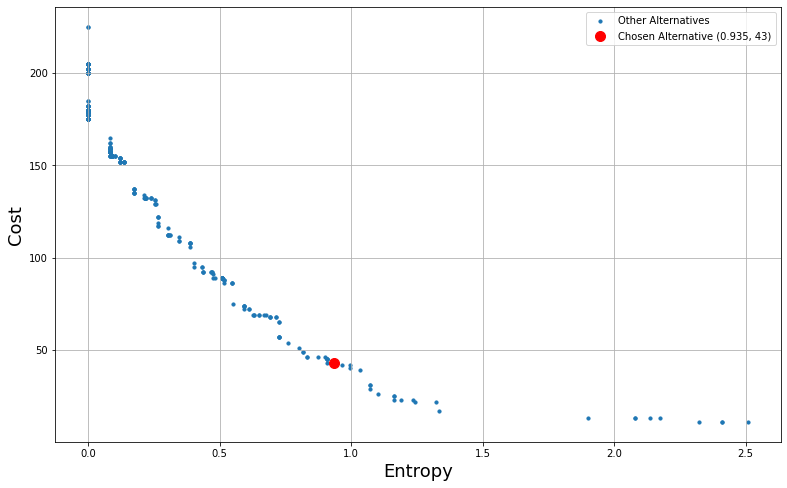

In [3]:
chosen_alternatives = [17]

plt.figure(figsize=(13, 8))
plt.grid(True)
plt.scatter(df['fitness1'], df['fitness2'], s=10)
plt.scatter(df['fitness1'].iloc[chosen_alternatives], df['fitness2'].iloc[chosen_alternatives], s=100, c='red')
plt.xlabel('Entropy')
plt.xlabel('Entropy', fontsize=18)
plt.ylabel('Cost', fontsize=18)
#plt.title('Pareto front with Chosen Alternative (Bayes)', fontsize=15)

# Add legend
chosen_fitness1 = round(df['fitness1'].iloc[chosen_alternatives].values[0], 3)
chosen_fitness2 = round(df['fitness2'].iloc[chosen_alternatives].values[0], 3)
plt.legend(['Other Alternatives', f'Chosen Alternative ({chosen_fitness1}, {chosen_fitness2})'])
#plt.show()
plt.savefig('decision.png')

In [252]:
break

SyntaxError: 'break' outside loop (<ipython-input-252-6aaf1f276005>, line 4)

## Naive

In [253]:
df = pd.read_csv('../results/res_naive/pareto_front.csv', index_col=0)

In [254]:
alternatives = [[f1, f2] for f1, f2 in zip(df['fitness1'], df['fitness2'])]
data = {}

for i in range (len(alternatives)):
    data['A'+str(i)] = alternatives[i]

In [255]:
weights = [0.7, 0.3]
prefs = ["min", "min"]
vetoes = [1, 10]
indifference_threshold = 0.6
preference_thresholds = None # or None for Electre Iv

e = Electre(data=data, verbose=False)

results = e.solve(weights, prefs, vetoes, indifference_threshold, preference_thresholds)

In [256]:
results['kernels']

['A57', 'A58']

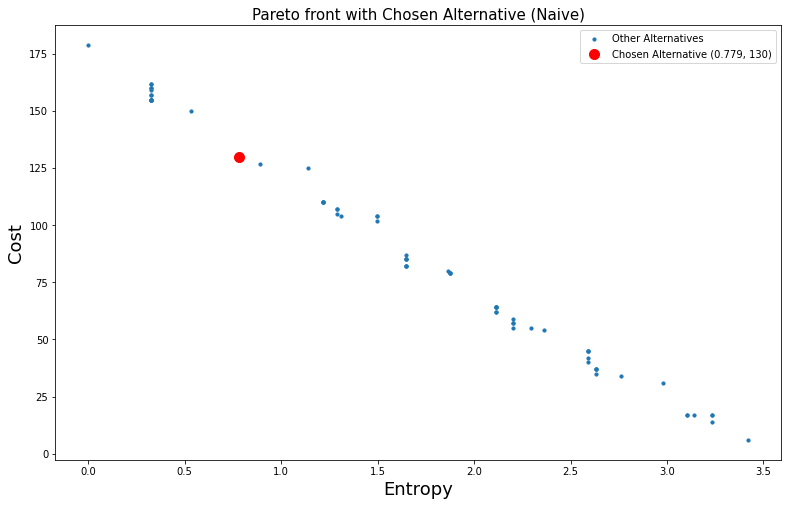

In [257]:
chosen_alternatives = [58]

plt.figure(figsize=(13, 8))
plt.scatter(df['fitness1'], df['fitness2'], s=10)
plt.scatter(df['fitness1'].iloc[chosen_alternatives], df['fitness2'].iloc[chosen_alternatives], s=100, c='red')
plt.xlabel('Entropy', fontsize=18)
plt.ylabel('Cost', fontsize=18)
plt.title('Pareto front with Chosen Alternative (Naive)', fontsize=15)

# Add legend
chosen_fitness1 = round(df['fitness1'].iloc[chosen_alternatives].values[0], 3)
chosen_fitness2 = round(df['fitness2'].iloc[chosen_alternatives].values[0], 3)
plt.legend(['Other Alternatives', f'Chosen Alternative ({chosen_fitness1}, {chosen_fitness2})'])

plt.show()